In [1]:
from matplotlib import pyplot as plt

from loki.libloki.configs import PulsarSearchConfig
from loki.search import ffa_search
from pyloki.config import ParamLimits
from pyloki.simulation.pulse import PulseSignalConfig

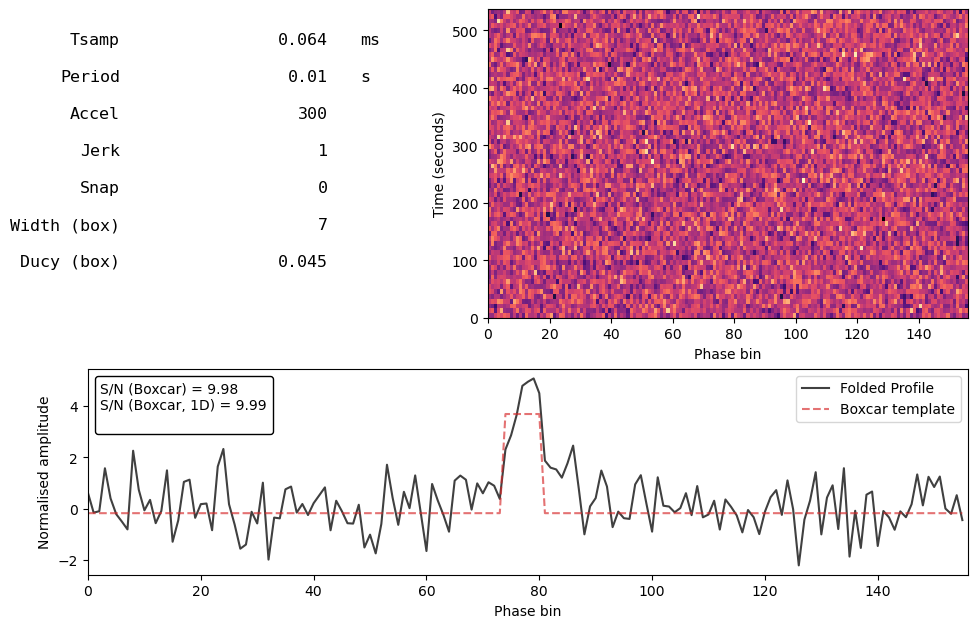

In [2]:
pulsar_period = 0.010
dt = 64e-6
accel = 300
jerk = 1
nsamps = 2**23
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10, ducy=0.1,
                        mod_kwargs=mod_kwargs)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [3]:
tol_bins = 3 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-1.5, 1.5), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 128
search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, ducy_max=0.2, wtsp=1.5, nthreads=8, use_fft_shifts=True)
ffa_plan, pgram = ffa_search(tim_data, search_cfg)

Param limits: [(np.float64(-1.5), np.float64(1.5)), (np.float64(-102.65318400000001), np.float64(702.653184)), (np.float64(99.95511100138201), np.float64(100.04488899861799))]
[2025-07-02 11:40:44.300] [info] PulsarSearchConfigClass: nsamps=8388608, tsamp=6.4e-05, nbins=64, tol_bins=3, ducy_max=0.2, wtsp=1.5, prune_poly_order=3, prune_n_derivs=3, bseg_brute=65536, bseg_ffa=8388608, use_fft_shifts=true, branch_max=16, nthreads=8
[2025-07-02 11:40:48.840] [info] FFACOMPLEX Memory Usage: 3.54 GB (1 buffers)
[2025-07-02 11:40:49.211] [info] FFACOMPLEX::execute started
[2025-07-02 11:40:49.211] [info] FFACOMPLEX::initialize started
[2025-07-02 11:40:49.231] [info] FFACOMPLEX::initialize took 19 ms
[2025-07-02 11:40:51.645] [info] FFACOMPLEX::execute took 2433 ms


Computing FFA... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  100% :00s<00m:00s] 


In [4]:
print(pgram.get_indices_summary(true_values={"jerk": cfg.mod_kwargs["jerk"], "accel": cfg.mod_kwargs["acc"], "freq": cfg.freq},))
print(pgram.get_summary())

True param indices: (57, 102, 256)
Best param indices: (np.int64(59), np.int64(103), np.int64(255), np.int64(4))
Best S/N: 9.67
Best Period: 0.01000002614899961
Best jerk: 1.108695652173913
Best accel: 301.9451844637681
Best freq: 99.99973851068766
Best width: 6


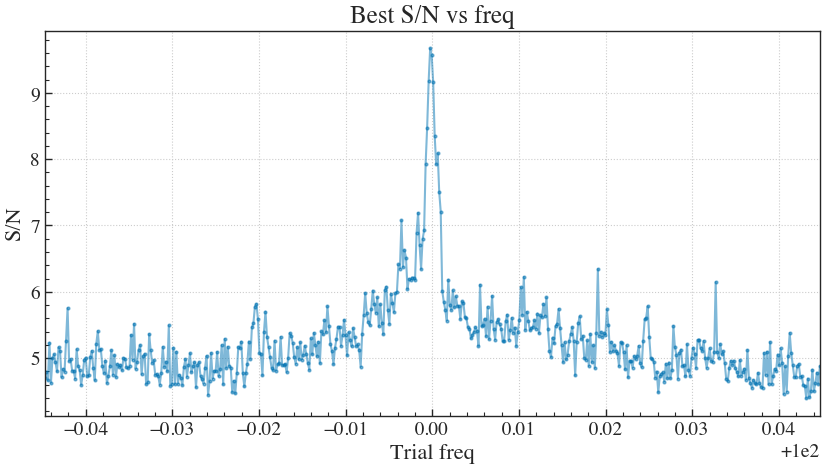

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

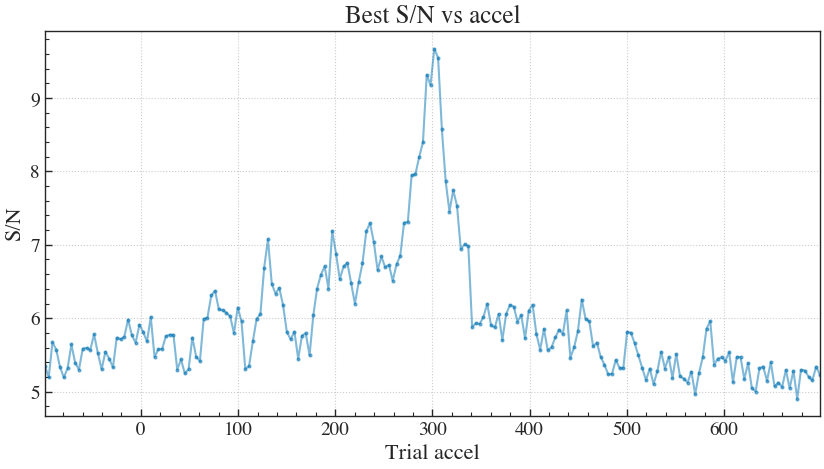

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

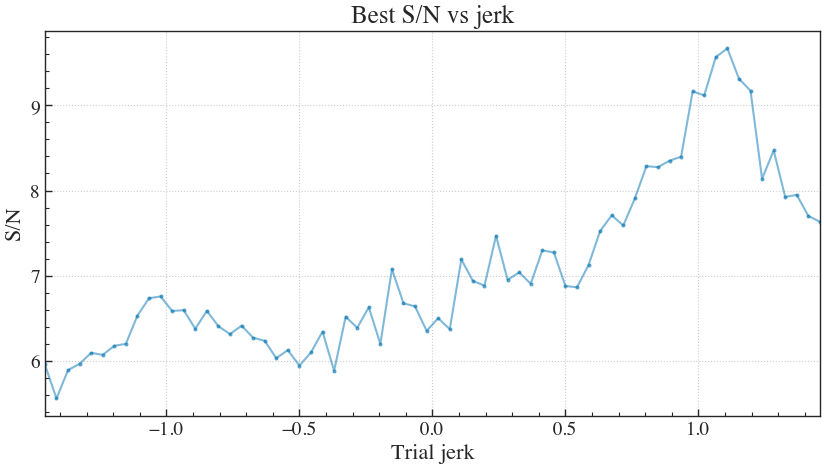

In [7]:
fig = pgram.plot_1d("jerk", figsize=(10, 5))
plt.show()

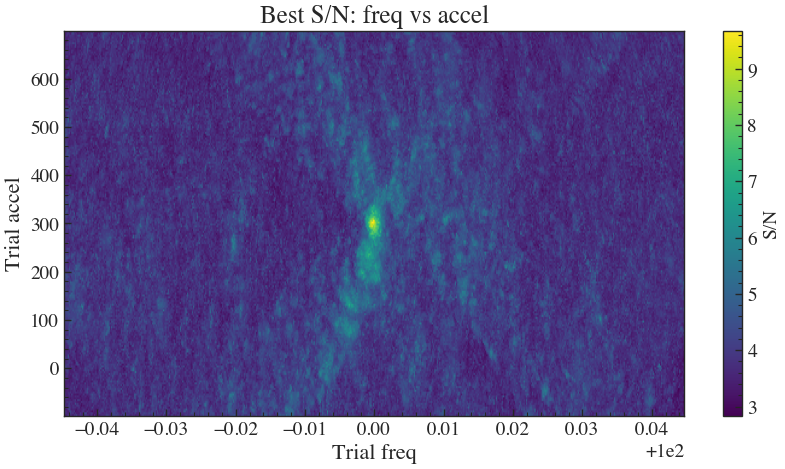

In [8]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()

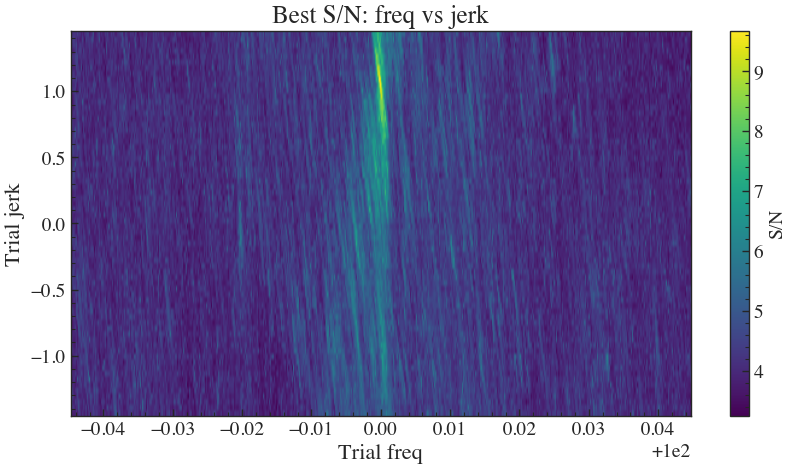

In [9]:
fig = pgram.plot_2d("freq", "jerk", figsize=(10, 5))
plt.show()

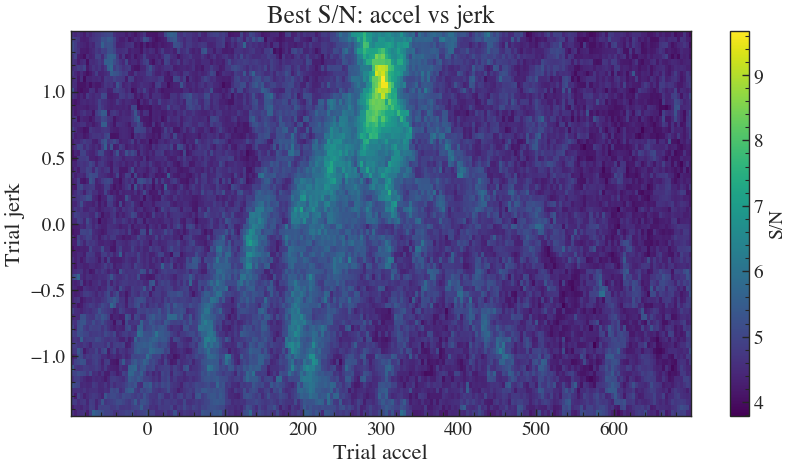

In [10]:
fig = pgram.plot_2d("accel", "jerk", figsize=(10, 5))
plt.show()

In [11]:
ffa_plan.memory_usage / 2**30

3.5405709743499756